# 3 Conjuntos desbalanceados

In [30]:
# Importando os pacotes
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [31]:
import os
print("Diretório Atual:", os.getcwd())

Diretório Atual: C:\Users\educl


### A602

In [32]:
# Importando o Dataset
file = open('A602.pickle' , 'rb')
(X_train , y_train , X_val , y_val , X_test , y_test) = pickle.load(file)
print(f"Shapes: ", X_train.shape , X_val.shape , X_test.shape, y_train.shape , y_val.shape , y_test.shape)

Shapes:  (10178, 24) (2565, 24) (765, 24) (10178, 1) (2565, 1) (765, 1)


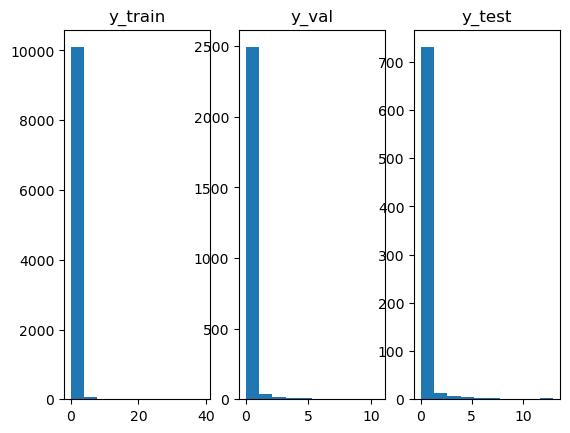

In [33]:
# Verificando os valores diferentes de zero e um. Fica evidente a presença de valores diferentes de zero e um no histograma.

plt.subplot(1, 3, 1)
plt.hist(y_train)
plt.title('y_train')

plt.subplot(1, 3, 2)
plt.hist(y_val)
plt.title('y_val')

plt.subplot(1, 3, 3)
plt.hist(y_test)
plt.title('y_test')

# Exiba os gráficos
plt.show()


In [34]:
# Substituindo todos os valores diferentes de zero por 1

y_train[y_train != 0] = 1
y_val[y_val != 0] = 1
y_test[y_test != 0] = 1

# Salve as variáveis
with open('A602_substituido.pickle', 'wb') as file:
  pickle.dump((y_train, y_val, y_test), file)


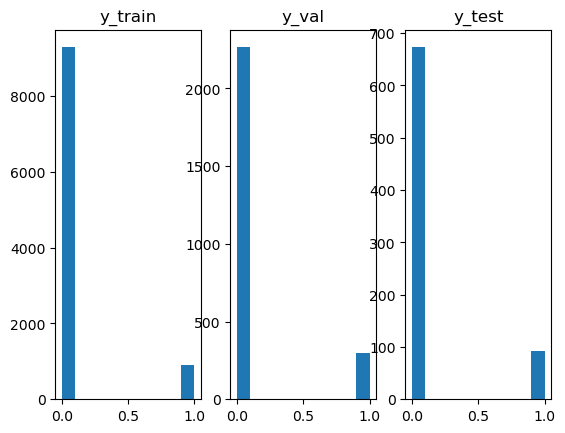

In [35]:
plt.subplot(1, 3, 1)
plt.hist(y_train)
plt.title('y_train')

plt.subplot(1, 3, 2)
plt.hist(y_val)
plt.title('y_val')

plt.subplot(1, 3, 3)
plt.hist(y_test)
plt.title('y_test')

# Exiba os gráficos
plt.show()


In [36]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [37]:
gb_base = GradientBoostingClassifier()
gb_base.fit(X_train, y_train.ravel())

GradientBoostingClassifier()

In [38]:
results_f = []

In [39]:
# Avaliar o desempenho no modelo base
y_pred_base = gb_base.predict(X_test)
confusion_matrix_base = confusion_matrix(y_test, y_pred_base)
classification_report_base = classification_report(y_test, y_pred_base, output_dict=True)

print("Matriz de Confusão do Modelo Base:")
print(confusion_matrix_base)
print("\nRelatório de Classificação do Modelo Base:")
print(classification_report(y_test, y_pred_base))

results_f.append({
    'Technique': 'Modelo Base',
    'Precision': classification_report_base['weighted avg']['precision'],
    'Recall': classification_report_base['weighted avg']['recall'],
    'F1 Score': classification_report_base['weighted avg']['f1-score']
})

Matriz de Confusão do Modelo Base:
[[573 100]
 [ 36  56]]

Relatório de Classificação do Modelo Base:
              precision    recall  f1-score   support

         0.0       0.94      0.85      0.89       673
         1.0       0.36      0.61      0.45        92

    accuracy                           0.82       765
   macro avg       0.65      0.73      0.67       765
weighted avg       0.87      0.82      0.84       765



# Aplicando técnicas de balanceamento dos dados

#### *Undersampling:* A técnica é conhecida como "downsampling" ou "undersampling". Ela é uma abordagem de balanceamento de dados usada em problemas de classificação binária em que as classes majoritárias têm muito mais exemplos do que as classes minoritárias. O código está criando uma versão equilibrada do conjunto de dados, reduzindo aleatoriamente o número de exemplos da classe majoritária para que corresponda ao número de exemplos da classe minoritária.

In [40]:
y_train.dtype, y_test.dtype, y_val.dtype

(dtype('float64'), dtype('float64'), dtype('float64'))

In [41]:
# Aplicar undersampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

# Treinar o modelo com os dados undersampled
gb_undersampled = GradientBoostingClassifier()
gb_undersampled.fit(X_resampled, y_resampled)

# Avaliar o desempenho no conjunto de teste após undersampling
y_pred_undersampled = gb_undersampled.predict(X_test)
print("Matriz de Confusão com undersampling:")
print(confusion_matrix(y_test, y_pred_undersampled))
print("\nRelatório de Classificação com undersampling:")
print(classification_report(y_test, y_pred_undersampled))

classification_report_undersampled = classification_report(y_test, y_pred_undersampled, output_dict=True)
results_f.append({
    'Technique': 'Undersampling',
    'Precision': classification_report_undersampled['weighted avg']['precision'],
    'Recall': classification_report_undersampled['weighted avg']['recall'],
    'F1 Score': classification_report_undersampled['weighted avg']['f1-score']
})


Matriz de Confusão com undersampling:
[[420 253]
 [ 11  81]]

Relatório de Classificação com undersampling:
              precision    recall  f1-score   support

         0.0       0.97      0.62      0.76       673
         1.0       0.24      0.88      0.38        92

    accuracy                           0.65       765
   macro avg       0.61      0.75      0.57       765
weighted avg       0.89      0.65      0.72       765



#### *Oversampling:* Ao contrário do undersampling, que reduz o número de exemplos da classe majoritária, o oversampling visa aumentar a quantidade de exemplos na classe minoritária, tornando-as mais equilibradas.

In [42]:
# Aplicar oversampling
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Treinar o modelo com os dados oversampled
gb_oversampled = GradientBoostingClassifier()
gb_oversampled.fit(X_resampled, y_resampled)

# Avaliar o desempenho no conjunto de teste após oversampling
y_pred_oversampled = gb_oversampled.predict(X_test)

print("Matriz de Confusão com oversampling:")
print(confusion_matrix(y_test, y_pred_oversampled))
print("\nRelatório de Classificação com oversampling:")
print(classification_report(y_test, y_pred_oversampled))

classification_report_oversampled = classification_report(y_test, y_pred_oversampled, output_dict=True)
results_f.append({
    'Technique': 'Oversampling',
    'Precision': classification_report_oversampled['weighted avg']['precision'],
    'Recall': classification_report_oversampled['weighted avg']['recall'],
    'F1 Score': classification_report_oversampled['weighted avg']['f1-score']
})

Matriz de Confusão com oversampling:
[[573 100]
 [ 28  64]]

Relatório de Classificação com oversampling:
              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90       673
         1.0       0.39      0.70      0.50        92

    accuracy                           0.83       765
   macro avg       0.67      0.77      0.70       765
weighted avg       0.89      0.83      0.85       765



#### *Threshold* refere-se ao limiar de decisão em um modelo de classificação. Em um modelo de classificação binária, a saída do modelo é uma pontuação de probabilidade que indica a confiança do modelo na predição de uma classe específica. O limiar de decisão é um valor que separa essas probabilidades em classes distintas. Ao ajustar o limiar de decisão, você pode influenciar o equilíbrio entre precisão e recall do seu modelo. Se você aumentar o limiar, pode aumentar a precisão, mas diminuir o recall, e vice-versa. Isso é especialmente útil quando as classes estão desbalanceadas.

In [43]:
# Criar uma lista para armazenar os resultados
results = []

# Obter as probabilidades previstas em vez das classes preditas
y_prob_base = gb_base.predict_proba(X_val)[:, 1]

# Variar o limiar de decisão de 0.2 a 0.9
thresholds = [0.2, 0.3, 0.5, 0.7, 0.9]

# Criar um DataFrame vazio
results_df = pd.DataFrame()

# Loop para cada threshold
for threshold in thresholds:
    y_pred_threshold = (y_prob_base > threshold).astype(int)

    # Calcular as métricas
    report = classification_report(y_val, y_pred_threshold, output_dict=True)
    
    # Adicionar os resultados à lista
    results.append({
        'Threshold': threshold,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1 Score': report['weighted avg']['f1-score']
    })
       
    results_f.append({
        'Technique': f'Threshold {threshold}',
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1 Score': report['weighted avg']['f1-score']
    })   

In [44]:
    #Criar um DataFrame a partir dos resultados
    results_df = pd.DataFrame(results)

     #Exibir a tabela
    print(results_df.to_markdown(index=False)) 

|   Threshold |   Precision |   Recall |   F1 Score |
|------------:|------------:|---------:|-----------:|
|         0.2 |    0.934207 | 0.9278   |   0.930539 |
|         0.3 |    0.937128 | 0.93664  |   0.93688  |
|         0.5 |    0.934813 | 0.939587 |   0.936382 |
|         0.7 |    0.929618 | 0.937132 |   0.928683 |
|         0.9 |    0.9129   | 0.918959 |   0.887917 |


### A602 - Final

In [45]:
# Criar um DataFrame a partir dos resultados
results_df2 = pd.DataFrame(results_f)

# Exibir a tabela final
print(results_df2.to_markdown(index=False))

| Technique     |   Precision |   Recall |   F1 Score |
|:--------------|------------:|---------:|-----------:|
| Modelo Base   |    0.870905 | 0.822222 |   0.840724 |
| Undersampling |    0.886451 | 0.654902 |   0.7151   |
| Oversampling  |    0.885684 | 0.83268  |   0.851481 |
| Threshold 0.2 |    0.934207 | 0.9278   |   0.930539 |
| Threshold 0.3 |    0.937128 | 0.93664  |   0.93688  |
| Threshold 0.5 |    0.934813 | 0.939587 |   0.936382 |
| Threshold 0.7 |    0.929618 | 0.937132 |   0.928683 |
| Threshold 0.9 |    0.9129   | 0.918959 |   0.887917 |


### A621

In [46]:
# Importando o Dataset
file = open('A621.pickle' , 'rb')
(X_train , y_train , X_val , y_val , X_test , y_test) = pickle.load(file)
print(f"Shapes: ", X_train.shape , X_val.shape , X_test.shape, y_train.shape , y_val.shape , y_test.shape)

Shapes:  (9549, 24) (2428, 24) (10080, 24) (9549, 1) (2428, 1) (10080, 1)


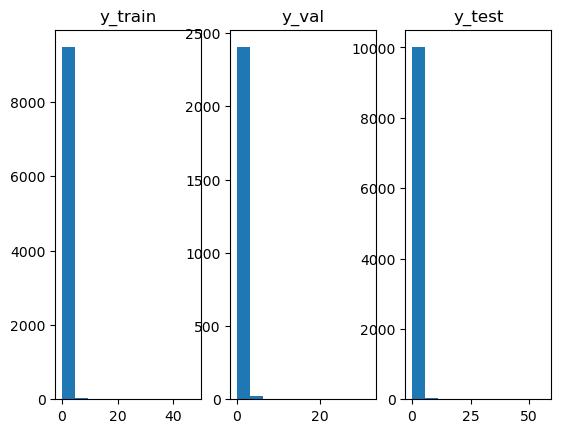

In [47]:
# Verificando os valores diferentes de zero e um. Fica evidente a presença de valores diferentes de zero e um no histograma.

plt.subplot(1, 3, 1)
plt.hist(y_train)
plt.title('y_train')

plt.subplot(1, 3, 2)
plt.hist(y_val)
plt.title('y_val')

plt.subplot(1, 3, 3)
plt.hist(y_test)
plt.title('y_test')

# Exiba os gráficos
plt.show()

In [48]:
# Substituindo todos os valores diferentes de zero por 1
y_train[y_train != 0] = 1
y_val[y_val != 0] = 1
y_test[y_test != 0] = 1

# Salve as variáveis
with open('A621_substituido.pickle', 'wb') as file:
  pickle.dump((y_train, y_val, y_test), file)

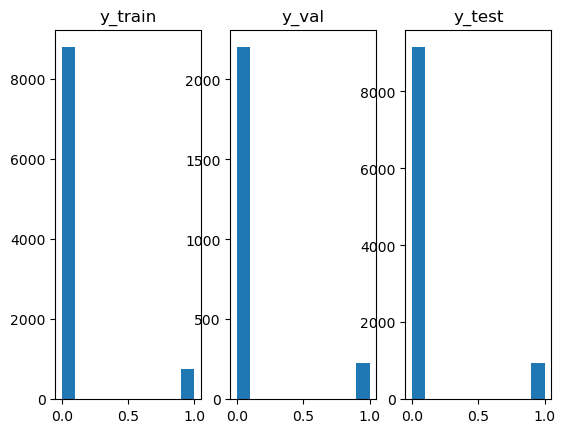

In [49]:
plt.subplot(1, 3, 1)
plt.hist(y_train)
plt.title('y_train')

plt.subplot(1, 3, 2)
plt.hist(y_val)
plt.title('y_val')

plt.subplot(1, 3, 3)
plt.hist(y_test)
plt.title('y_test')

# Exiba os gráficos
plt.show()


In [50]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)
gb_base = GradientBoostingClassifier()
gb_base.fit(X_train, y_train.ravel())

GradientBoostingClassifier()

In [51]:
results_f = []

In [52]:
# Avaliar o desempenho no modelo base
y_pred_base = gb_base.predict(X_test)
confusion_matrix_base = confusion_matrix(y_test, y_pred_base)
classification_report_base = classification_report(y_test, y_pred_base, output_dict=True)

print("Matriz de Confusão do Modelo Base:")
print(confusion_matrix_base)
print("\nRelatório de Classificação do Modelo Base:")
print(classification_report(y_test, y_pred_base))

results_f.append({
    'Technique': 'Modelo Base',
    'Precision': classification_report_base['weighted avg']['precision'],
    'Recall': classification_report_base['weighted avg']['recall'],
    'F1 Score': classification_report_base['weighted avg']['f1-score']
})

Matriz de Confusão do Modelo Base:
[[8722  425]
 [ 410  523]]

Relatório de Classificação do Modelo Base:
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95      9147
         1.0       0.55      0.56      0.56       933

    accuracy                           0.92     10080
   macro avg       0.75      0.76      0.76     10080
weighted avg       0.92      0.92      0.92     10080



# Aplicando técnicas de balanceamento dos dados

In [53]:
y_train.dtype, y_test.dtype, y_val.dtype

(dtype('float64'), dtype('float64'), dtype('float64'))

In [54]:
# Aplicar undersampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

# Treinar o modelo com os dados undersampled
gb_undersampled = GradientBoostingClassifier()
gb_undersampled.fit(X_resampled, y_resampled)

# Avaliar o desempenho no conjunto de teste após undersampling
y_pred_undersampled = gb_undersampled.predict(X_test)
print("Matriz de Confusão com undersampling:")
print(confusion_matrix(y_test, y_pred_undersampled))
print("\nRelatório de Classificação com undersampling:")
print(classification_report(y_test, y_pred_undersampled))

classification_report_undersampled = classification_report(y_test, y_pred_undersampled, output_dict=True)
results_f.append({
    'Technique': 'Undersampling',
    'Precision': classification_report_undersampled['weighted avg']['precision'],
    'Recall': classification_report_undersampled['weighted avg']['recall'],
    'F1 Score': classification_report_undersampled['weighted avg']['f1-score']
})


Matriz de Confusão com undersampling:
[[4349 4798]
 [  96  837]]

Relatório de Classificação com undersampling:
              precision    recall  f1-score   support

         0.0       0.98      0.48      0.64      9147
         1.0       0.15      0.90      0.25       933

    accuracy                           0.51     10080
   macro avg       0.56      0.69      0.45     10080
weighted avg       0.90      0.51      0.60     10080



In [55]:
# Aplicar oversampling
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Treinar o modelo com os dados oversampled
gb_oversampled = GradientBoostingClassifier()
gb_oversampled.fit(X_resampled, y_resampled)

# Avaliar o desempenho no conjunto de teste após oversampling
y_pred_oversampled = gb_oversampled.predict(X_test)

print("Matriz de Confusão com oversampling:")
print(confusion_matrix(y_test, y_pred_oversampled))
print("\nRelatório de Classificação com oversampling:")
print(classification_report(y_test, y_pred_oversampled))

classification_report_oversampled = classification_report(y_test, y_pred_oversampled, output_dict=True)
results_f.append({
    'Technique': 'Oversampling',
    'Precision': classification_report_oversampled['weighted avg']['precision'],
    'Recall': classification_report_oversampled['weighted avg']['recall'],
    'F1 Score': classification_report_oversampled['weighted avg']['f1-score']
})

Matriz de Confusão com oversampling:
[[4797 4350]
 [ 111  822]]

Relatório de Classificação com oversampling:
              precision    recall  f1-score   support

         0.0       0.98      0.52      0.68      9147
         1.0       0.16      0.88      0.27       933

    accuracy                           0.56     10080
   macro avg       0.57      0.70      0.48     10080
weighted avg       0.90      0.56      0.64     10080



In [56]:
# Criar uma lista para armazenar os resultados
results = []

# Obter as probabilidades previstas em vez das classes preditas
y_prob_base = gb_base.predict_proba(X_val)[:, 1]

# Variar o limiar de decisão de 0.2 a 0.9
thresholds = [0.2, 0.3, 0.5, 0.7, 0.9]

# Criar um DataFrame vazio
results_df = pd.DataFrame()

# Loop para cada threshold
for threshold in thresholds:
    y_pred_threshold = (y_prob_base > threshold).astype(int)

    # Calcular as métricas
    report = classification_report(y_val, y_pred_threshold, output_dict=True)
    
    # Adicionar os resultados à lista
    results.append({
        'Threshold': threshold,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1 Score': report['weighted avg']['f1-score']
    })
       
    results_f.append({
        'Technique': f'Threshold {threshold}',
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1 Score': report['weighted avg']['f1-score']
    })   

In [57]:
#Criar um DataFrame a partir dos resultados
results_df = pd.DataFrame(results)

#Exibir a tabela
print(results_df.to_markdown(index=False)) 

|   Threshold |   Precision |   Recall |   F1 Score |
|------------:|------------:|---------:|-----------:|
|         0.2 |    0.927581 | 0.926702 |   0.927133 |
|         0.3 |    0.929876 | 0.935602 |   0.932009 |
|         0.5 |    0.926919 | 0.936126 |   0.928251 |
|         0.7 |    0.921486 | 0.932984 |   0.920686 |
|         0.9 |    0.900147 | 0.921466 |   0.888992 |


In [58]:
#Criar um DataFrame a partir dos resultados
results_df2 = pd.DataFrame(results_f)

#Exibir a tabela final
print(results_df2.to_markdown(index=False))

| Technique     |   Precision |   Recall |   F1 Score |
|:--------------|------------:|---------:|-----------:|
| Modelo Base   |    0.917763 | 0.917163 |   0.917459 |
| Undersampling |    0.901591 | 0.514484 |   0.604294 |
| Oversampling  |    0.901628 | 0.55744  |   0.644348 |
| Threshold 0.2 |    0.927581 | 0.926702 |   0.927133 |
| Threshold 0.3 |    0.929876 | 0.935602 |   0.932009 |
| Threshold 0.5 |    0.926919 | 0.936126 |   0.928251 |
| Threshold 0.7 |    0.921486 | 0.932984 |   0.920686 |
| Threshold 0.9 |    0.900147 | 0.921466 |   0.888992 |


### A627

In [59]:
# Importando o Dataset
file = open('A627.pickle' , 'rb')
(X_train , y_train , X_val , y_val , X_test , y_test) = pickle.load(file)
print(f"Shapes: ", X_train.shape , X_val.shape , X_test.shape, y_train.shape , y_val.shape , y_test.shape)

Shapes:  (9682, 24) (2235, 24) (10202, 24) (9682, 1) (2235, 1) (10202, 1)


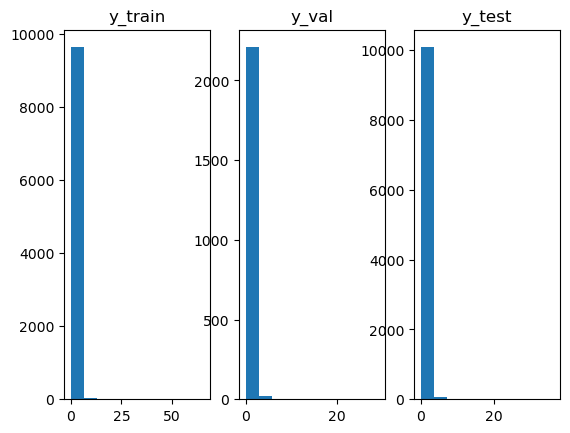

In [60]:
# Verificando os valores diferentes de zero e um. Fica evidente a presença de valores diferentes de zero e um no histograma.

plt.subplot(1, 3, 1)
plt.hist(y_train)
plt.title('y_train')

plt.subplot(1, 3, 2)
plt.hist(y_val)
plt.title('y_val')

plt.subplot(1, 3, 3)
plt.hist(y_test)
plt.title('y_test')

# Exiba os gráficos
plt.show()

In [61]:
# Substituindo todos os valores diferentes de zero por 1
y_train[y_train != 0] = 1
y_val[y_val != 0] = 1
y_test[y_test != 0] = 1

# Salve as variáveis
with open('A627_substituido.pickle', 'wb') as file:
  pickle.dump((y_train, y_val, y_test), file)

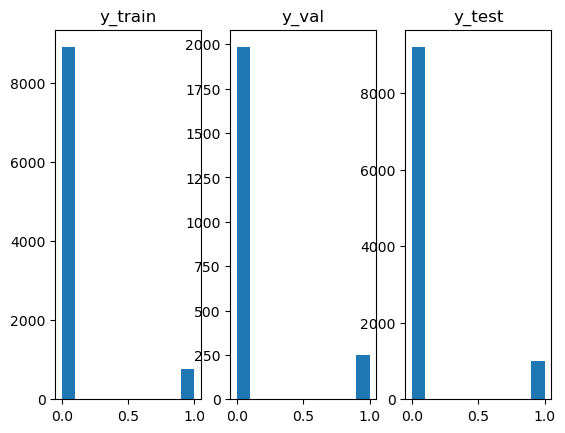

In [62]:
plt.subplot(1, 3, 1)
plt.hist(y_train)
plt.title('y_train')

plt.subplot(1, 3, 2)
plt.hist(y_val)
plt.title('y_val')

plt.subplot(1, 3, 3)
plt.hist(y_test)
plt.title('y_test')

# Exiba os gráficos
plt.show()


In [63]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)
gb_base = GradientBoostingClassifier()
gb_base.fit(X_train, y_train.ravel())

GradientBoostingClassifier()

In [64]:
results_f = []

In [65]:
# Avaliar o desempenho no modelo base
y_pred_base = gb_base.predict(X_test)
confusion_matrix_base = confusion_matrix(y_test, y_pred_base)
classification_report_base = classification_report(y_test, y_pred_base, output_dict=True)

print("Matriz de Confusão do Modelo Base:")
print(confusion_matrix_base)
print("\nRelatório de Classificação do Modelo Base:")
print(classification_report(y_test, y_pred_base))

results_f.append({
    'Technique': 'Modelo Base',
    'Precision': classification_report_base['weighted avg']['precision'],
    'Recall': classification_report_base['weighted avg']['recall'],
    'F1 Score': classification_report_base['weighted avg']['f1-score']
})

Matriz de Confusão do Modelo Base:
[[8905  295]
 [ 424  578]]

Relatório de Classificação do Modelo Base:
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      9200
         1.0       0.66      0.58      0.62      1002

    accuracy                           0.93     10202
   macro avg       0.81      0.77      0.79     10202
weighted avg       0.93      0.93      0.93     10202



# Aplicando técnicas de balanceamento dos dados

In [66]:
y_train.dtype, y_test.dtype, y_val.dtype

(dtype('float64'), dtype('float64'), dtype('float64'))

In [67]:
# Aplicar undersampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

# Treinar o modelo com os dados undersampled
gb_undersampled = GradientBoostingClassifier()
gb_undersampled.fit(X_resampled, y_resampled)

# Avaliar o desempenho no conjunto de teste após undersampling
y_pred_undersampled = gb_undersampled.predict(X_test)
print("Matriz de Confusão com undersampling:")
print(confusion_matrix(y_test, y_pred_undersampled))
print("\nRelatório de Classificação com undersampling:")
print(classification_report(y_test, y_pred_undersampled))

classification_report_undersampled = classification_report(y_test, y_pred_undersampled, output_dict=True)
results_f.append({
    'Technique': 'Undersampling',
    'Precision': classification_report_undersampled['weighted avg']['precision'],
    'Recall': classification_report_undersampled['weighted avg']['recall'],
    'F1 Score': classification_report_undersampled['weighted avg']['f1-score']
})


Matriz de Confusão com undersampling:
[[7494 1706]
 [ 168  834]]

Relatório de Classificação com undersampling:
              precision    recall  f1-score   support

         0.0       0.98      0.81      0.89      9200
         1.0       0.33      0.83      0.47      1002

    accuracy                           0.82     10202
   macro avg       0.65      0.82      0.68     10202
weighted avg       0.91      0.82      0.85     10202



In [68]:
# Aplicar oversampling
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Treinar o modelo com os dados oversampled
gb_oversampled = GradientBoostingClassifier()
gb_oversampled.fit(X_resampled, y_resampled)

# Avaliar o desempenho no conjunto de teste após oversampling
y_pred_oversampled = gb_oversampled.predict(X_test)

print("Matriz de Confusão com oversampling:")
print(confusion_matrix(y_test, y_pred_oversampled))
print("\nRelatório de Classificação com oversampling:")
print(classification_report(y_test, y_pred_oversampled))

classification_report_oversampled = classification_report(y_test, y_pred_oversampled, output_dict=True)
results_f.append({
    'Technique': 'Oversampling',
    'Precision': classification_report_oversampled['weighted avg']['precision'],
    'Recall': classification_report_oversampled['weighted avg']['recall'],
    'F1 Score': classification_report_oversampled['weighted avg']['f1-score']
})

Matriz de Confusão com oversampling:
[[8166 1034]
 [ 262  740]]

Relatório de Classificação com oversampling:
              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93      9200
         1.0       0.42      0.74      0.53      1002

    accuracy                           0.87     10202
   macro avg       0.69      0.81      0.73     10202
weighted avg       0.91      0.87      0.89     10202



In [69]:
# Criar uma lista para armazenar os resultados
results = []

# Obter as probabilidades previstas em vez das classes preditas
y_prob_base = gb_base.predict_proba(X_val)[:, 1]

# Variar o limiar de decisão de 0.25 a 0.75 com incrementos de 0.25
thresholds = [0.2, 0.3, 0.5, 0.7, 0.9]

# Criar um DataFrame vazio
results_df = pd.DataFrame()

# Loop para cada threshold
for threshold in thresholds:
    y_pred_threshold = (y_prob_base > threshold).astype(int)

    # Calcular as métricas
    report = classification_report(y_val, y_pred_threshold, output_dict=True)
    
    # Adicionar os resultados à lista
    results.append({
        'Threshold': threshold,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1 Score': report['weighted avg']['f1-score']
    })
       
    results_f.append({
        'Technique': f'Threshold {threshold}',
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1 Score': report['weighted avg']['f1-score']
    })  

In [70]:
#Criar um DataFrame a partir dos resultados
results_df = pd.DataFrame(results)

#Exibir a tabela
print(results_df.to_markdown(index=False))  

|   Threshold |   Precision |   Recall |   F1 Score |
|------------:|------------:|---------:|-----------:|
|         0.2 |    0.937443 | 0.934435 |   0.935819 |
|         0.3 |    0.935582 | 0.938049 |   0.936695 |
|         0.5 |    0.934201 | 0.941146 |   0.935592 |
|         0.7 |    0.92803  | 0.937016 |   0.92479  |
|         0.9 |    0.921461 | 0.924109 |   0.891837 |


In [71]:
#Criar um DataFrame a partir dos resultados
results_df2 = pd.DataFrame(results_f)

#Exibir a tabela final
print(results_df2.to_markdown(index=False))

| Technique     |   Precision |   Recall |   F1 Score |
|:--------------|------------:|---------:|-----------:|
| Modelo Base   |    0.925826 | 0.929524 |   0.927345 |
| Undersampling |    0.91426  | 0.816311 |   0.847814 |
| Oversampling  |    0.91472  | 0.872966 |   0.887848 |
| Threshold 0.2 |    0.937443 | 0.934435 |   0.935819 |
| Threshold 0.3 |    0.935582 | 0.938049 |   0.936695 |
| Threshold 0.5 |    0.934201 | 0.941146 |   0.935592 |
| Threshold 0.7 |    0.92803  | 0.937016 |   0.92479  |
| Threshold 0.9 |    0.921461 | 0.924109 |   0.891837 |


### A636

In [72]:
# Importando o Dataset
file = open('A636.pickle' , 'rb')
(X_train , y_train , X_val , y_val , X_test , y_test) = pickle.load(file)
print(f"Shapes: ", X_train.shape , X_val.shape , X_test.shape, y_train.shape , y_val.shape , y_test.shape)

Shapes:  (10219, 24) (2414, 24) (10129, 24) (10219, 1) (2414, 1) (10129, 1)


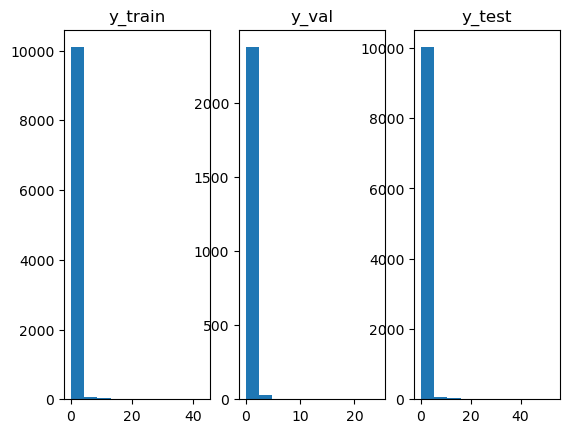

In [73]:
# Verificando os valores diferentes de zero e um. Fica evidente a presença de valores diferentes de zero e um no histograma.

plt.subplot(1, 3, 1)
plt.hist(y_train)
plt.title('y_train')

plt.subplot(1, 3, 2)
plt.hist(y_val)
plt.title('y_val')

plt.subplot(1, 3, 3)
plt.hist(y_test)
plt.title('y_test')

# Exiba os gráficos
plt.show()

In [74]:
# Substituindo todos os valores diferentes de zero por 1
y_train[y_train != 0] = 1
y_val[y_val != 0] = 1
y_test[y_test != 0] = 1

# Salve as variáveis
with open('A636_substituido.pickle', 'wb') as file:
  pickle.dump((y_train, y_val, y_test), file)

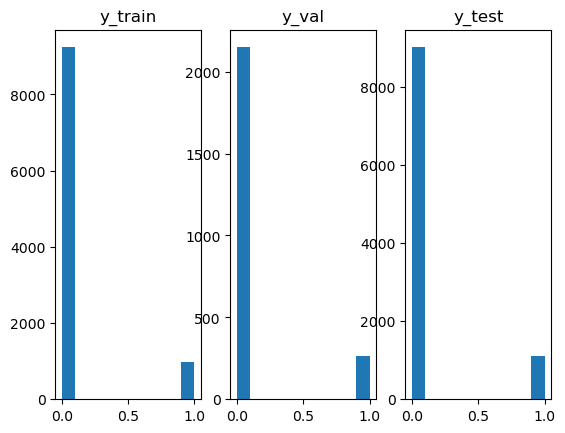

In [75]:
plt.subplot(1, 3, 1)
plt.hist(y_train)
plt.title('y_train')

plt.subplot(1, 3, 2)
plt.hist(y_val)
plt.title('y_val')

plt.subplot(1, 3, 3)
plt.hist(y_test)
plt.title('y_test')

# Exiba os gráficos
plt.show()


In [76]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)
gb_base = GradientBoostingClassifier()
gb_base.fit(X_train,  y_train.ravel())

GradientBoostingClassifier()

In [77]:
results_f = []

In [78]:
# Avaliar o desempenho no modelo base
y_pred_base = gb_base.predict(X_test)
confusion_matrix_base = confusion_matrix(y_test, y_pred_base)
classification_report_base = classification_report(y_test, y_pred_base, output_dict=True)

print("Matriz de Confusão do Modelo Base:")
print(confusion_matrix_base)
print("\nRelatório de Classificação do Modelo Base:")
print(classification_report(y_test, y_pred_base))

results_f.append({
    'Technique': 'Modelo Base',
    'Precision': classification_report_base['weighted avg']['precision'],
    'Recall': classification_report_base['weighted avg']['recall'],
    'F1 Score': classification_report_base['weighted avg']['f1-score']
})

Matriz de Confusão do Modelo Base:
[[8679  338]
 [ 469  643]]

Relatório de Classificação do Modelo Base:
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96      9017
         1.0       0.66      0.58      0.61      1112

    accuracy                           0.92     10129
   macro avg       0.80      0.77      0.79     10129
weighted avg       0.92      0.92      0.92     10129



# Aplicando técnicas de balanceamento dos dados

In [79]:
y_train.dtype, y_test.dtype, y_val.dtype

(dtype('float64'), dtype('float64'), dtype('float64'))

In [80]:
# Aplicar undersampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

# Treinar o modelo com os dados undersampled
gb_undersampled = GradientBoostingClassifier()
gb_undersampled.fit(X_resampled, y_resampled)

# Avaliar o desempenho no conjunto de teste após undersampling
y_pred_undersampled = gb_undersampled.predict(X_test)
print("Matriz de Confusão com undersampling:")
print(confusion_matrix(y_test, y_pred_undersampled))
print("\nRelatório de Classificação com undersampling:")
print(classification_report(y_test, y_pred_undersampled))

classification_report_undersampled = classification_report(y_test, y_pred_undersampled, output_dict=True)
results_f.append({
    'Technique': 'Undersampling',
    'Precision': classification_report_undersampled['weighted avg']['precision'],
    'Recall': classification_report_undersampled['weighted avg']['recall'],
    'F1 Score': classification_report_undersampled['weighted avg']['f1-score']
})


Matriz de Confusão com undersampling:
[[6896 2121]
 [ 244  868]]

Relatório de Classificação com undersampling:
              precision    recall  f1-score   support

         0.0       0.97      0.76      0.85      9017
         1.0       0.29      0.78      0.42      1112

    accuracy                           0.77     10129
   macro avg       0.63      0.77      0.64     10129
weighted avg       0.89      0.77      0.81     10129



In [81]:
# Aplicar oversampling
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Treinar o modelo com os dados oversampled
gb_oversampled = GradientBoostingClassifier()
gb_oversampled.fit(X_resampled, y_resampled)

# Avaliar o desempenho no conjunto de teste após oversampling
y_pred_oversampled = gb_oversampled.predict(X_test)

print("Matriz de Confusão com oversampling:")
print(confusion_matrix(y_test, y_pred_oversampled))
print("\nRelatório de Classificação com oversampling:")
print(classification_report(y_test, y_pred_oversampled))

classification_report_oversampled = classification_report(y_test, y_pred_oversampled, output_dict=True)
results_f.append({
    'Technique': 'Oversampling',
    'Precision': classification_report_oversampled['weighted avg']['precision'],
    'Recall': classification_report_oversampled['weighted avg']['recall'],
    'F1 Score': classification_report_oversampled['weighted avg']['f1-score']
})

Matriz de Confusão com oversampling:
[[7468 1549]
 [ 290  822]]

Relatório de Classificação com oversampling:
              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89      9017
         1.0       0.35      0.74      0.47      1112

    accuracy                           0.82     10129
   macro avg       0.65      0.78      0.68     10129
weighted avg       0.90      0.82      0.84     10129



In [82]:
# Criar uma lista para armazenar os resultados
results = []

# Obter as probabilidades previstas em vez das classes preditas
y_prob_base = gb_base.predict_proba(X_val)[:, 1]

# Variar o limiar de decisão de 0.25 a 0.75 com incrementos de 0.25
thresholds = [0.2, 0.3, 0.5, 0.7, 0.9]

# Criar um DataFrame vazio
results_df = pd.DataFrame()

# Loop para cada threshold
for threshold in thresholds:
    y_pred_threshold = (y_prob_base > threshold).astype(int)

    # Calcular as métricas
    report = classification_report(y_val, y_pred_threshold, output_dict=True)
    
    # Adicionar os resultados à lista
    results.append({
        'Threshold': threshold,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1 Score': report['weighted avg']['f1-score']
    })
       
    results_f.append({
        'Technique': f'Threshold {threshold}',
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1 Score': report['weighted avg']['f1-score']
    })  

In [83]:
#Criar um DataFrame a partir dos resultados
results_df = pd.DataFrame(results)

#Exibir a tabela
print(results_df.to_markdown(index=False))   

|   Threshold |   Precision |   Recall |   F1 Score |
|------------:|------------:|---------:|-----------:|
|         0.2 |    0.926682 | 0.921233 |   0.923621 |
|         0.3 |    0.930893 | 0.931507 |   0.931193 |
|         0.5 |    0.932662 | 0.937867 |   0.933861 |
|         0.7 |    0.926047 | 0.932975 |   0.923443 |
|         0.9 |    0.909632 | 0.915851 |   0.888829 |


In [84]:
#Criar um DataFrame a partir dos resultados
results_df2 = pd.DataFrame(results_f)

#Exibir a tabela final
print(results_df2.to_markdown(index=False))

| Technique     |   Precision |   Recall |   F1 Score |
|:--------------|------------:|---------:|-----------:|
| Modelo Base   |    0.916535 | 0.920328 |   0.918122 |
| Undersampling |    0.891675 | 0.766512 |   0.806382 |
| Oversampling  |    0.895    | 0.818442 |   0.844443 |
| Threshold 0.2 |    0.926682 | 0.921233 |   0.923621 |
| Threshold 0.3 |    0.930893 | 0.931507 |   0.931193 |
| Threshold 0.5 |    0.932662 | 0.937867 |   0.933861 |
| Threshold 0.7 |    0.926047 | 0.932975 |   0.923443 |
| Threshold 0.9 |    0.909632 | 0.915851 |   0.888829 |


### A652

In [85]:
# Importando o Dataset
file = open('A652.pickle' , 'rb')
(X_train , y_train , X_val , y_val , X_test , y_test) = pickle.load(file)
print(f"Shapes: ", X_train.shape , X_val.shape , X_test.shape, y_train.shape , y_val.shape , y_test.shape)

Shapes:  (10012, 24) (2506, 24) (9582, 24) (10012, 1) (2506, 1) (9582, 1)


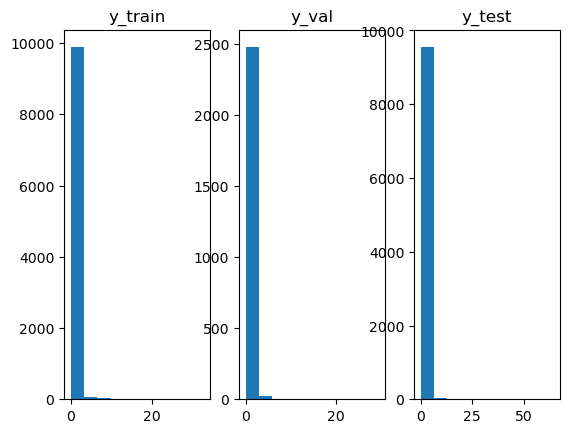

In [86]:
# Verificando os valores diferentes de zero e um. Fica evidente a presença de valores diferentes de zero e um no histograma.

plt.subplot(1, 3, 1)
plt.hist(y_train)
plt.title('y_train')

plt.subplot(1, 3, 2)
plt.hist(y_val)
plt.title('y_val')

plt.subplot(1, 3, 3)
plt.hist(y_test)
plt.title('y_test')

# Exiba os gráficos
plt.show()

In [87]:
# Substituindo todos os valores diferentes de zero por 1
y_train[y_train != 0] = 1
y_val[y_val != 0] = 1
y_test[y_test != 0] = 1

# Salve as variáveis
with open('A652_substituido.pickle', 'wb') as file:
  pickle.dump((y_train, y_val, y_test), file)

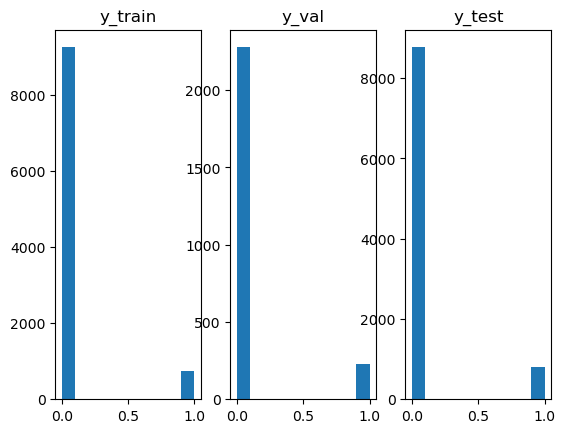

In [88]:
plt.subplot(1, 3, 1)
plt.hist(y_train)
plt.title('y_train')

plt.subplot(1, 3, 2)
plt.hist(y_val)
plt.title('y_val')

plt.subplot(1, 3, 3)
plt.hist(y_test)
plt.title('y_test')

# Exiba os gráficos
plt.show()


In [89]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)
gb_base = GradientBoostingClassifier()
gb_base.fit(X_train,  y_train.ravel())

GradientBoostingClassifier()

In [90]:
results_f = []

In [91]:
# Avaliar o desempenho no modelo base
y_pred_base = gb_base.predict(X_test)
confusion_matrix_base = confusion_matrix(y_test, y_pred_base)
classification_report_base = classification_report(y_test, y_pred_base, output_dict=True)

print("Matriz de Confusão do Modelo Base:")
print(confusion_matrix_base)
print("\nRelatório de Classificação do Modelo Base:")
print(classification_report(y_test, y_pred_base))

results_f.append({
    'Technique': 'Modelo Base',
    'Precision': classification_report_base['weighted avg']['precision'],
    'Recall': classification_report_base['weighted avg']['recall'],
    'F1 Score': classification_report_base['weighted avg']['f1-score']
})

Matriz de Confusão do Modelo Base:
[[8648  121]
 [ 503  310]]

Relatório de Classificação do Modelo Base:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      8769
         1.0       0.72      0.38      0.50       813

    accuracy                           0.93      9582
   macro avg       0.83      0.68      0.73      9582
weighted avg       0.93      0.93      0.93      9582



# Aplicando técnicas de balanceamento dos dados

In [92]:
y_train.dtype, y_test.dtype, y_val.dtype

(dtype('float64'), dtype('float64'), dtype('float64'))

In [93]:
# Aplicar undersampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

# Treinar o modelo com os dados undersampled
gb_undersampled = GradientBoostingClassifier()
gb_undersampled.fit(X_resampled, y_resampled)

# Avaliar o desempenho no conjunto de teste após undersampling
y_pred_undersampled = gb_undersampled.predict(X_test)
print("Matriz de Confusão com undersampling:")
print(confusion_matrix(y_test, y_pred_undersampled))
print("\nRelatório de Classificação com undersampling:")
print(classification_report(y_test, y_pred_undersampled))

classification_report_undersampled = classification_report(y_test, y_pred_undersampled, output_dict=True)
results_f.append({
    'Technique': 'Undersampling',
    'Precision': classification_report_undersampled['weighted avg']['precision'],
    'Recall': classification_report_undersampled['weighted avg']['recall'],
    'F1 Score': classification_report_undersampled['weighted avg']['f1-score']
})


Matriz de Confusão com undersampling:
[[7811  958]
 [ 259  554]]

Relatório de Classificação com undersampling:
              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93      8769
         1.0       0.37      0.68      0.48       813

    accuracy                           0.87      9582
   macro avg       0.67      0.79      0.70      9582
weighted avg       0.92      0.87      0.89      9582



In [94]:
# Aplicar oversampling
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Treinar o modelo com os dados oversampled
gb_oversampled = GradientBoostingClassifier()
gb_oversampled.fit(X_resampled, y_resampled)

# Avaliar o desempenho no conjunto de teste após oversampling
y_pred_oversampled = gb_oversampled.predict(X_test)

print("Matriz de Confusão com oversampling:")
print(confusion_matrix(y_test, y_pred_oversampled))
print("\nRelatório de Classificação com oversampling:")
print(classification_report(y_test, y_pred_oversampled))

classification_report_oversampled = classification_report(y_test, y_pred_oversampled, output_dict=True)
results_f.append({
    'Technique': 'Oversampling',
    'Precision': classification_report_oversampled['weighted avg']['precision'],
    'Recall': classification_report_oversampled['weighted avg']['recall'],
    'F1 Score': classification_report_oversampled['weighted avg']['f1-score']
})

Matriz de Confusão com oversampling:
[[8338  431]
 [ 313  500]]

Relatório de Classificação com oversampling:
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96      8769
         1.0       0.54      0.62      0.57       813

    accuracy                           0.92      9582
   macro avg       0.75      0.78      0.77      9582
weighted avg       0.93      0.92      0.92      9582



In [95]:
# Criar uma lista para armazenar os resultados
results = []

# Obter as probabilidades previstas em vez das classes preditas
y_prob_base = gb_base.predict_proba(X_val)[:, 1]

# Variar o limiar de decisão de 0.25 a 0.75 com incrementos de 0.25
thresholds = [0.2, 0.3, 0.5, 0.7, 0.9]

# Criar um DataFrame vazio
results_df = pd.DataFrame()

# Loop para cada threshold
for threshold in thresholds:
    y_pred_threshold = (y_prob_base > threshold).astype(int)

    # Calcular as métricas
    report = classification_report(y_val, y_pred_threshold, output_dict=True)
    
    # Adicionar os resultados à lista
    results.append({
        'Threshold': threshold,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1 Score': report['weighted avg']['f1-score']
    })
       
    results_f.append({
        'Technique': f'Threshold {threshold}',
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1 Score': report['weighted avg']['f1-score']
    })

In [96]:
#Criar um DataFrame a partir dos resultados
results_df = pd.DataFrame(results)

#Exibir a tabela
print(results_df.to_markdown(index=False))

|   Threshold |   Precision |   Recall |   F1 Score |
|------------:|------------:|---------:|-----------:|
|         0.2 |    0.943786 | 0.943085 |   0.943427 |
|         0.3 |    0.946126 | 0.948577 |   0.947161 |
|         0.5 |    0.945531 | 0.950574 |   0.94611  |
|         0.7 |    0.942766 | 0.948078 |   0.93987  |
|         0.9 |    0.936482 | 0.935097 |   0.912309 |


In [97]:
#Criar um DataFrame a partir dos resultados
results_df2 = pd.DataFrame(results_f)

#Exibir a tabela final
print(results_df2.to_markdown(index=False))

| Technique     |   Precision |   Recall |   F1 Score |
|:--------------|------------:|---------:|-----------:|
| Modelo Base   |    0.925877 | 0.934878 |   0.925573 |
| Undersampling |    0.91687  | 0.872991 |   0.889447 |
| Oversampling  |    0.92761  | 0.922354 |   0.924718 |
| Threshold 0.2 |    0.943786 | 0.943085 |   0.943427 |
| Threshold 0.3 |    0.946126 | 0.948577 |   0.947161 |
| Threshold 0.5 |    0.945531 | 0.950574 |   0.94611  |
| Threshold 0.7 |    0.942766 | 0.948078 |   0.93987  |
| Threshold 0.9 |    0.936482 | 0.935097 |   0.912309 |
